- (c) Ken-ichi Fukui, 2025/01/04
- MIT License

## 多層パーセプトロンによる手書き文字認識
- MLP Classifier
    - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, ValidationCurveDisplay, LearningCurveDisplay
from sklearn.datasets import fetch_openml

In [5]:
# openmlからMNISTデータをダウンロード
X_all, y_all = fetch_openml('mnist_784', return_X_y=True, parser='auto')

# 最初の2000点のみ使用する
n_sub_data = 2000
X_sub, y_sub = X_all[:n_sub_data], y_all[:n_sub_data].astype(int)

### PCAによる次元圧縮

In [3]:
def train_pca(X, n_comp):
    pca = PCA(n_components=n_comp)
    return pca.fit_transform(X)

### 多層パーセプトロン(MLP)のインスタンスの生成と学習

In [11]:
X_sub_pca = train_pca(X=X_sub, n_comp=30)

mlp = MLPClassifier(
        hidden_layer_sizes=(100,), #隠れ層のノード数
        activation='relu',         #活性化関数
        solver='adam',             #最適化アルゴリズム
        early_stopping=True,       #早期停止の設定
        n_iter_no_change=20        #早期停止の停滞上限
)
scores = cross_validate(mlp, X_sub_pca, y_sub, cv=5, return_train_score=True)
print("Ave. Training data accuracy: ", np.average(scores['train_score']))
print("Ave. Test data accuracy: ", np.average(scores['test_score']))

Ave. Training data accuracy:  0.957625
Ave. Test data accuracy:  0.7915


### 損失関数の学習曲線の描画

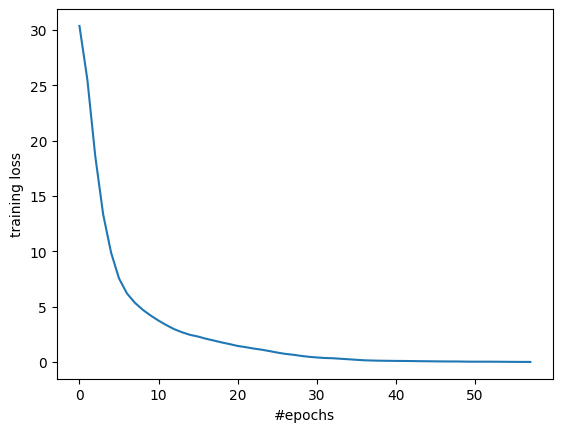

In [7]:
plt.plot(mlp.loss_curve_)
plt.xlabel("#epochs")
plt.ylabel("training loss")
plt.show()

### 学習データおよびテストデータに対するAccuracyの算出

In [ ]:
y_trn_pred = nn.predict(X_trn_pca)
acc = np.sum(y_trn == y_trn_pred, axis=0)*100 / X_trn_pca.shape[0]
print('accuracy for training data: %.2f%%' % acc)

y_tst_pred = nn.predict(X_tst_pca)
acc = np.sum(y_tst == y_tst_pred, axis=0)*100 / X_tst_pca.shape[0]
print('accuracy for test data: %.2f%%' % acc)

accuracy for training data: 84.10%
accuracy for test data: 73.50%
